<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 8 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (Линейные модели)
<h3> Plan </h3>

* **Линейная Регрессия ** (20 minutes) 
 - Linear Model for Regression
 - Regularization: Ridge Regression, LASSO
 - Решение задачи МНК
 

* **SVD** (30 minutes)
 - SVD: demo
 - SVD picture compression
 - Реализация и исследование RidgeRegression


* ** Additional ** (30 minutes)
 - Use case: Budget optimization
 - HW3: solution

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris
from sklearn.datasets import 

# import operator
# from os import listdir
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# from numpy.linalg import *
# from scipy.stats.stats import pearsonr
from numpy import linalg as la

%matplotlib inline
# sns.set_context("notebook", font_scale=1.5)
# import random
# from IPython.display import Image, SVG
# from scipy import optimize

** Key words:**
   * линейная регрессия, гребневая регрессия, лассо Тибширани
   * регуляризация
   * сингулярное разложение, сингулярные числа, сингулярное разложение

<h1 align="center"> Linear Regression </h1>
** Вопросы **
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?
* Как выглядит решение регрессионного уравнения для гребневой регрессии?
* Что такое SVD


## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

<img src='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/09_linear_models/496/pic/Regularization.PNG?raw=true'>

### Regularization for LR:

## $$ Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2 $$


vs

## $$ \sum_{i=1}^{n} |\alpha_i| \leq C $$


See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

# Решение задачи МНК

In [53]:
def my_linear_regression(X_train, Y_train):
    try:
        w = np.dot(
                la.inv(X_train.transpose()*X_train)*X_train.transpose(), 
            Y_train)
    except:
        print('The matrix X^T*X is not invertible!')
        return None
    return w

### Игрушечный датасет

In [56]:
X = np.array([[1,0], [0,3]], dtype=np.double)
Y = np.array([1,1], dtype=np.double)

In [57]:
my_linear_regression(X, Y)

array([1.        , 0.33333333])

### Реальный датасет

In [88]:
# https://archive.ics.uci.edu/ml/datasets/Cargo+2000+Freight+Tracking+and+Tracing#
data= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data')
# pd.DataFrame.from_records([str(data.loc[data.index[0]]).replace('  ',' ').split() for x in data.index])
# , header=['Longitudinal position of the center of buoyancy','Prismatic coefficient','Length-displacement ratio','Beam-draught ratio','Length-beam ratio','Froude number','Residuary resistance per unit weight of displacement']
# data.head()

In [ ]:
# put here your code

-------
<h1 align="center"> SVD и решение задач линейной регрессии</h1> 

# SVD

<img src='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2018/seminars/8_linear_models/pic/SVD.png?raw=true'>

## $$A = VDU^T$$

* $A$ - произвольная матрица $n\times m$
* $V$ - ортогональная матрица $n\times n$
* $D$ - диагональная матрица размером $n\times m$
* $D$ - ортогональная матрица размером $m\times m$

** About SVD **:
* http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm
* http://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/    

demo http://setosa.io/ev/principal-component-analysis/

In [115]:
# Example 1: https://pm429015.wordpress.com/2013/05/21/singular-value-decomposition-svd/

# load data points
iris =load_iris()

#normalize and remove mean
data = iris.data

In [111]:
 
def svd(data, S=2):
     
    samples,features = data.shape
 
    #calculate SVD
    U, s, V = la.svd(data)
    Sig = mat(eye(S)*s[:S])
    #tak out columns you don't need
    newdata = U[:,:S]
     
    # this line is used to retrieve dataset 
    #~ new = U[:,:2]*Sig*V[:2,:]
 
    fig = plt.figure(figsize =(15,5))
    ax = fig.add_subplot(1,1,1)
    colors = ['blue','red','black']
    for i in range(samples):
        ax.scatter(newdata[i,0],newdata[i,1], color= colors[int(data[i,-1])])
    plt.xlabel('SVD1')
    plt.ylabel('SVD2')
    

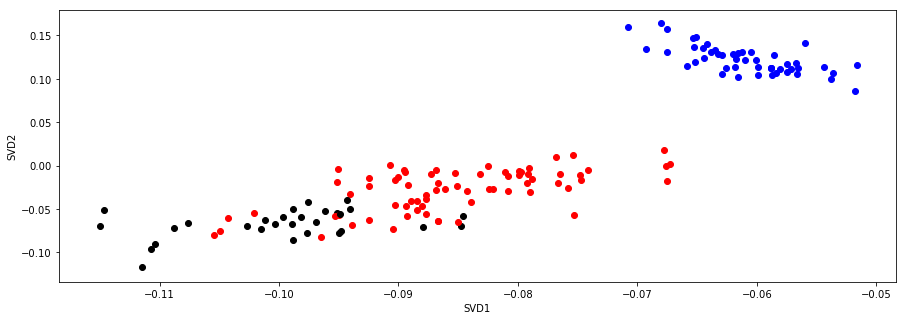

In [112]:
 svd(data,2)

# SVD picture compression

Picture decomposition: http://timbaumann.info/svd-image-compression-demo/

** Задание** : построейте SVD декомпозицию и сожмите картинку
    <img src='https://www.canandcam.com/wp-content/uploads/2017/05/foto.jpg'>

In [113]:
# put your code below

# Реализация и исследование SVD

** Вопросы**
* Как с помощью SVD разложения матрицы регрессии записывается решение задачи МНК и гребневой регрессии?

## $$ w= UD^{-1} V^T y$$
## $$ w^{ridge}= U (D^2+\tau I_n)^{-1} D V^T y$$

** Задание **: реализуйте гребневую регрессию так, чтобы можно было эффективно подбирать коэффициент регуляризации

In [100]:
def my_ridge_regressio(X_train, Y_train):
    TODO
    return w

In [119]:
# Подберите оптимальное значение для коэффициента регуляризации для датасета выше

<h1 align="center"> Additional </h1>

## Разбор прикладной задачи: прогнозирование трудозатрат склада
<img src="http://www.abr.com/wp-content/uploads/2014/04/Inventory-Management_4.7.15.jpg" width=100%>

К вам обращается крупная Retail-компания с целью решить задачу предсказания трудозатрат на Распределительном центре.

* ** Описание задачи **
Через распределительный центр ежедневного проходит $10^5-10^8$ штук товаров, хранится при этом в 10 раз больше товаров. Все товары делятся на $n=5$ групп (например, Яблоки, Бананы, Кокосы, Апельсины и Баклажан), и в компании есть планы по нагрузке на РЦ по каждой группе: т.е. инфо о количестве товаров, которые придут на РЦ, и которые будут отгружены в РЦ.

Операции (бизнес-процессы), которые проходит каждая штука, очень сложны и разнообразны, у компании нет возможности отслеживать движение каждой штуки на РЦ. 



Логистическая дирекция просит вас помочь:
 1) научить взвешивать трудоёмкость обработки каждой из групп товаров;
 2) постройте калькулятор трудозатрат на склад: т.е. программу, которая могла бы пересчитывать нагрузку в штуках в количество человек, которое нужно нанять, чтобы обработать эту нагрузку.

* ** Бизнес-ограничения **
    1. Логистическая дирекция постоянно оптимизирует бизнес-процессы, так что производительность опытных сотрудников склада монотонно неубывает.
    2. На складе происходит постоянная ротация персонала, доля новичков может меняться из месяца в месяц.
        * Так, например, В ноябре и декабре на складе наступает пиковая нагрузка, которая в 3 раза превышает среднегодовую! В связи с этим в ноябре на складе больше половины новых сотрудкников - новички.
        * Упрощение: будем считать, что отношение производительности новичка к производительности опытного сотрудника = 0.65 (константа).
    3. Есть планы на год вперёд (при планировании бюджета - 1 раз в год), и есть планы еженедельные о нагрузке на следующую неделю:
     * Какой вы думаете должна быть допустимая ошибка вашего прогноза в обоих случаях?
    4. При прогнозировании ежендельном: 
        * если НЕДОпредсказать нагрузку, то компания может потерять деньги, из-за того, что не весь товар будет отправлен на продажу, 
        * если предсказать трудозатрат больше, чем будет, то комания переплатит (оплата за полную смену, а работы всего не полсмены). 
    5. У вас есть следующие данные: 1) нагрузка по каждой из групп товаров за каждый день за 2,5 года назад 2) количество людей в смене (в разбивке новичок/опытный) 3) дата начала и дата окончания смены.    
   
* ** Как измерить результат **
    1. Можно измерить какая была ошибка при экспертном планировании (при еженедльном ~20%, при годовом ~10%), и какая стала при внедрении калькулятора.
    2. Понимание того, какой вклад даёт каждая из групп товаров, позволяет более тонко управлять (развивать) процессы на складе (т.е. вы сделали процесс более прозрачным).
    3. Возможность пересчитывать нагрузки в одну единицу (например 1 Яблоко = 3 Банана) приводит к более чёткому взаимодействию в другими подразделениями. Например, можно говорить о максимльной пропускной способности в Яблоках(т.е. вы упростили процесс коммуникации).
    
* **Вопросы:**
    1. Как поставить задачу машинного обучения? Что есть целевая переменная?
    2. Какие признаки следует добавить в обучающую выборку? Сколько их будет?
    3. Какое взять решающее правило? 
    4. Как настроить параметры? Не забудьте про постоянное изменение производительности на РЦ
    5. Как часто стоит пересчитывать параметры?

# HW3: solution

<h1 align="center">Заключение</h1>  

** Linear Regression **
* Достоинства
    - простое аналитическое решение
    - простая вероятностная интерпертация
    - RidgeRegression и Lasso - простые методы по устранению проблемы мультиколлинеарности
* Недостатки:
    - только линейная зависимость


** Обратная связь ** 
  * оцените <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> семинар </a>
  * оставьте <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции